In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<p>Finding and removing duplicates</p>

In [83]:
df.duplicated().sum()

0

In [84]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [85]:
df.fillna({
    'director' : 'not specified',
    'cast' : 'not specified',
    'country' : 'not specified',
    'date_added' : 'not tracked'
}, inplace=True)

In [86]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [87]:
df.loc[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


<p>From the above output we can observe duration value is NaN, the rating field is filled with the values of duration.
    and should be filled with what is inside rating and the rating value should be none</p>

In [88]:
df.loc[df['director'] == 'Louis C.K.', "duration"] = df['rating']

In [89]:
df.loc[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [90]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unavailable'

In [91]:
df.loc[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


In [92]:
df.loc[df['director'] == 'Louis C.K.', 'cast'] = 'not mentioned'

In [93]:
df.loc[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,not mentioned,United States,"April 4, 2017",2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,not mentioned,United States,"September 16, 2016",2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,not mentioned,United States,"August 15, 2016",2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


In [94]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,not specified,"Oprah Winfrey, Ava DuVernay",not specified,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,not specified,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,not specified,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [95]:
df['rating'].fillna('Unavailabel', inplace=True)

In [96]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [97]:
df.duplicated().sum()

0

In [98]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [99]:
import seaborn as sns

In [100]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<h2>What type of show netflix produces the most?</h2>

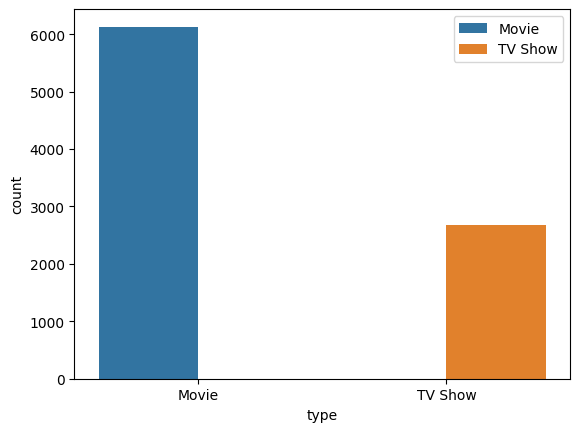

In [101]:
sns.countplot(data=df, x='type', hue='type')
plt.legend()

<h2>Which country produces the most content?</h2>

In [102]:
df.country.value_counts().head(10)

country
United States     2818
India              972
not specified      831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [103]:
df.country.value_counts().index[0:10] # Top 10 countries that produce most of the content

Index(['United States', 'India', 'not specified', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain', 'France', 'Mexico'],
      dtype='object', name='country')

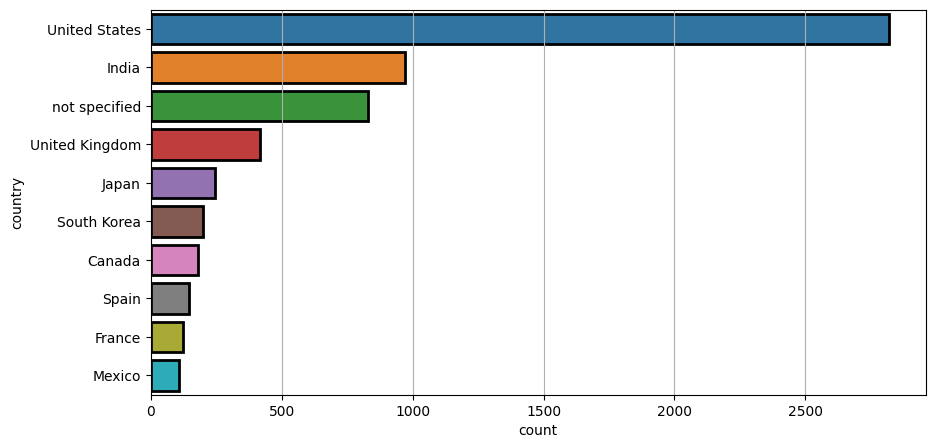

In [104]:
plt.figure(figsize=(10, 5))
plt.title = ("Top 10 movie producer countries")
plt.grid(True)
sns.countplot(data=df, order=df.country.value_counts().index[0:10], y='country', lw=2, ec='black')
plt.show()

<h2>Which country produces most movies and Tv shows?</h2>

In [105]:
movies_df = df[df['type'] == 'Movie']  # data frames that only contains movies
movies_df.country.value_counts().index[0:10]  #Top 10 movie producing countries

Index(['United States', 'India', 'not specified', 'United Kingdom', 'Canada',
       'Spain', 'Egypt', 'Nigeria', 'Indonesia', 'Turkey'],
      dtype='object', name='country')

In [106]:
Tv_show_df = df[df['type'] == 'TV Show']
Tv_show_df.country.value_counts().index[0:10] #Top 10 Tv Show producing countries


Index(['United States', 'not specified', 'United Kingdom', 'Japan',
       'South Korea', 'India', 'Taiwan', 'Canada', 'France', 'Australia'],
      dtype='object', name='country')

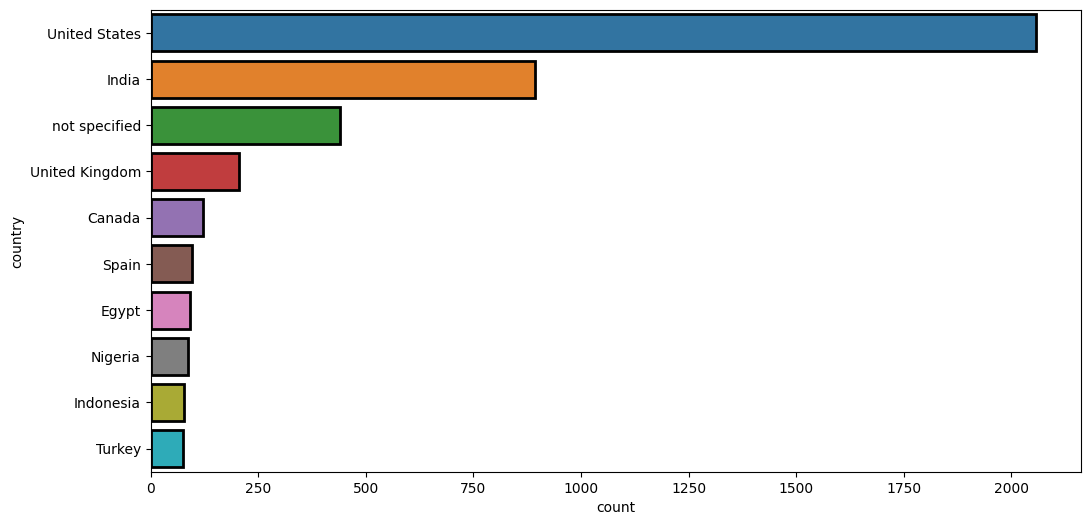

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(data=movies_df, y='country', order=movies_df.country.value_counts().index[0:10], lw=2, ec='black')
plt.title = ("sfs")

<h2>What is the rating of most of the content on Netflix?</h2>

In [108]:
df.rating.value_counts()  # count of rating of movies

rating
TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
TV-Y7-FV          6
Unavailabel       4
NC-17             3
Unavailable       3
UR                3
Name: count, dtype: int64

In [109]:
df.rating.value_counts().index[0:10]  # Top to rating of movies

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR'],
      dtype='object', name='rating')

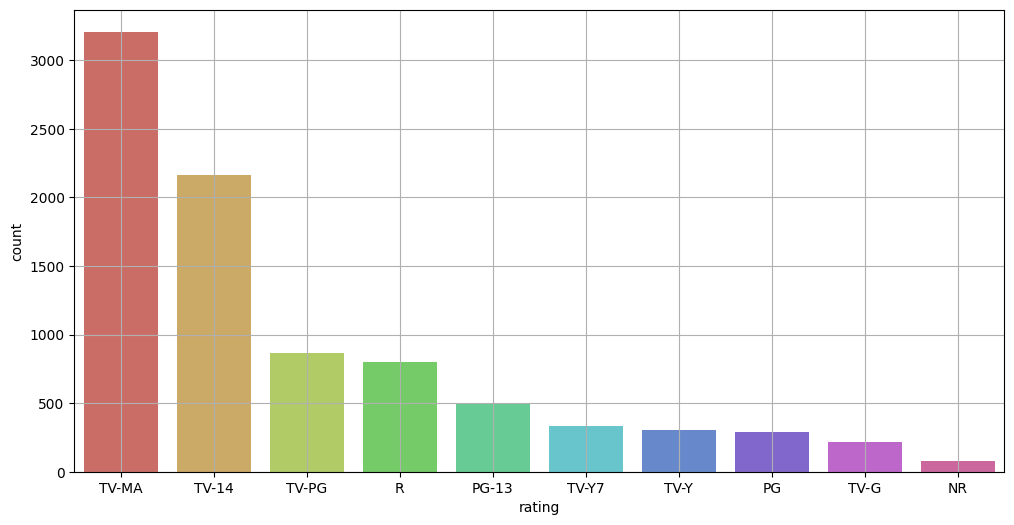

In [110]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df.rating.value_counts().index[0:10], palette='hls')
# plt.title('Top 10 Rating of Movies', fontsize=20)
plt.grid(True)
plt.show()

<h2>In which year Netflix produced most of the contents?<h2>

In [111]:
df['release_year']

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

Text(-3.6805555555555554, 0.5, 'No of contents')

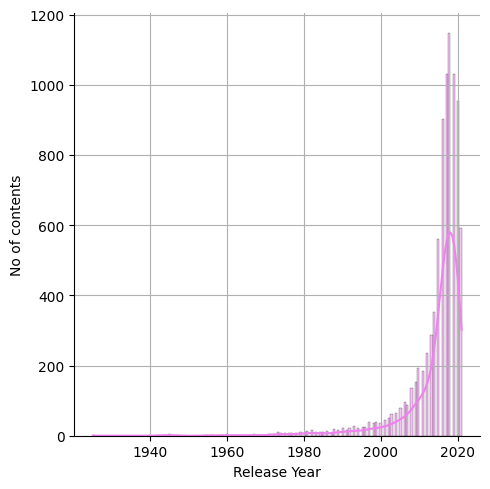

In [112]:
sns.displot(data=df['release_year'], color='violet', kde=True)
plt.grid(True)
plt.xlabel("Release Year")
plt.ylabel("No of contents")

<h2>Which catogory of content Netflix produce most?<h2>

In [113]:
df.listed_in.value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [114]:
y = list(df.listed_in.value_counts().head().keys())
x = list(df.listed_in.value_counts().head())

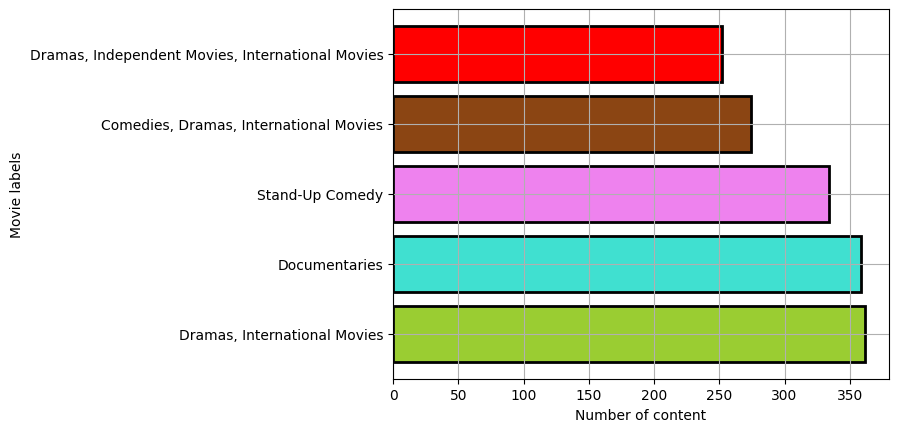

In [115]:
plt.barh(y, x, color=["#9ACD32", "#40E0D0", "#EE82EE", "#8B4513",'#FF0000'], ec='black', lw=2)
plt.xlabel("Number of content")
plt.ylabel("Movie labels")
plt.grid(True)
plt.show()


<h4>Another way of plotting the same data<h4>

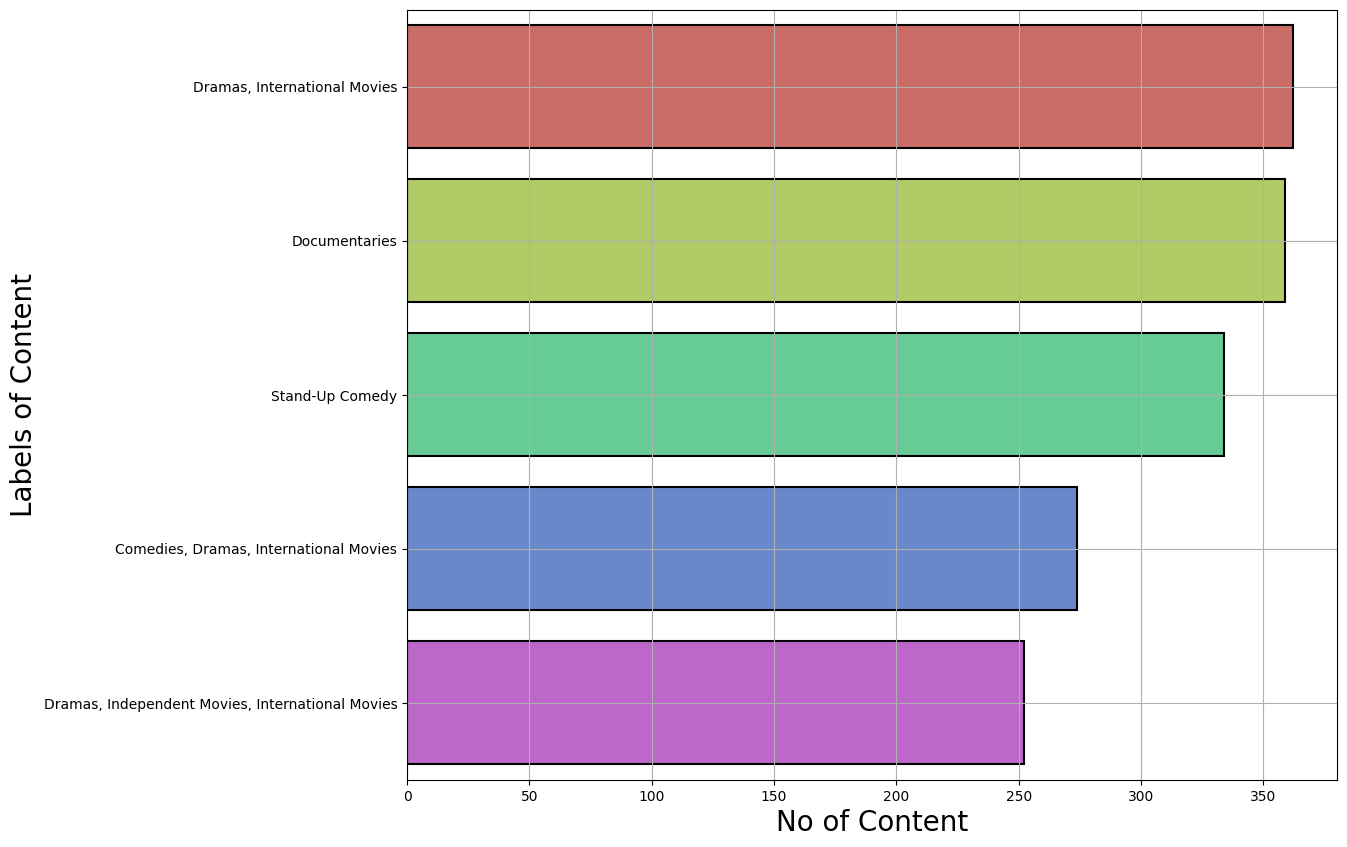

In [116]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, y='listed_in', order=df.listed_in.value_counts().index[0:5], palette='hls', ec='black', lw=1.5)
plt.xlabel("No of Content", fontsize=20)
plt.ylabel("Labels of Content", fontsize=20)
plt.grid(True)
plt.show()

<h2>Who directs most of the content?<h2>

In [117]:
df.director.value_counts().head()

director
not specified             2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Name: count, dtype: int64

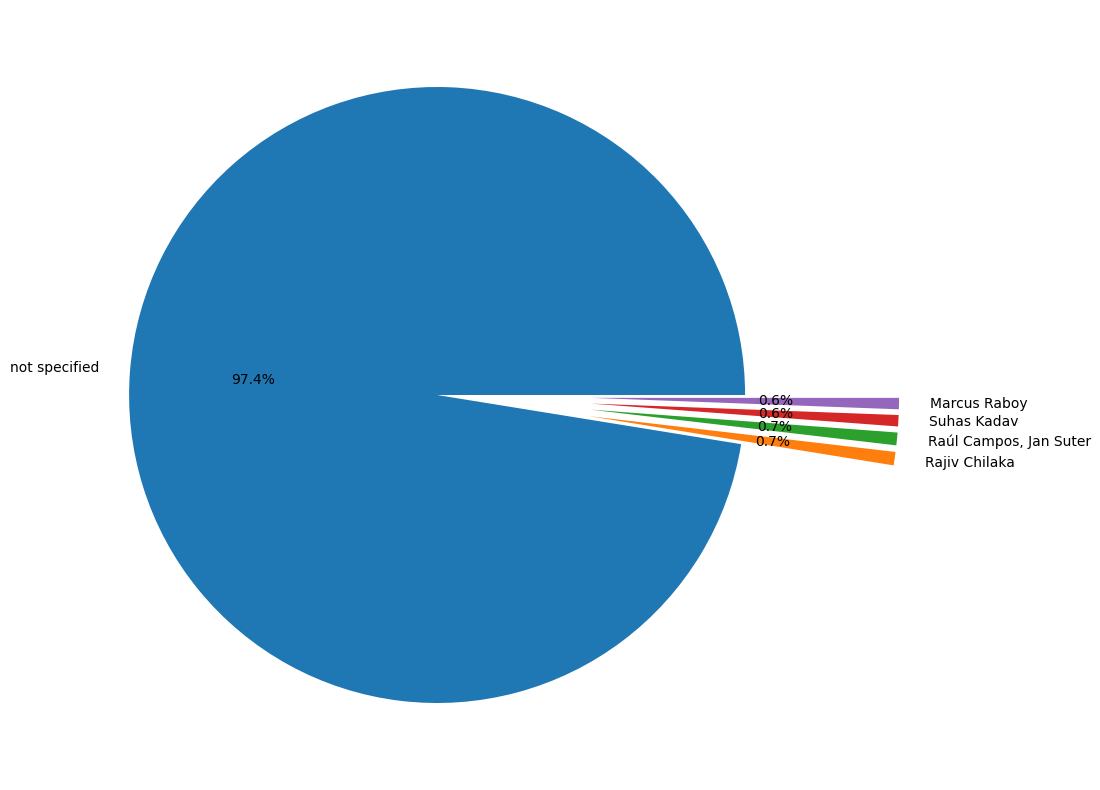

In [118]:
plt.figure(figsize=(10, 10))
plt.pie(list(df.director.value_counts().head(5)), labels=list(df.director.value_counts().index[0:5]), 
        autopct='%0.1f%%', explode=[0, 0.5, 0.5, 0.5, 0.5])
plt.show()

<h2>Who cast most of the contents on Netflix?<h2>

In [119]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,not specified,not specified,not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [120]:
df.cast.value_counts().head()

cast
not specified                                                                              825
David Attenborough                                                                          19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil     14
Samuel West                                                                                 10
Jeff Dunham                                                                                  7
Name: count, dtype: int64

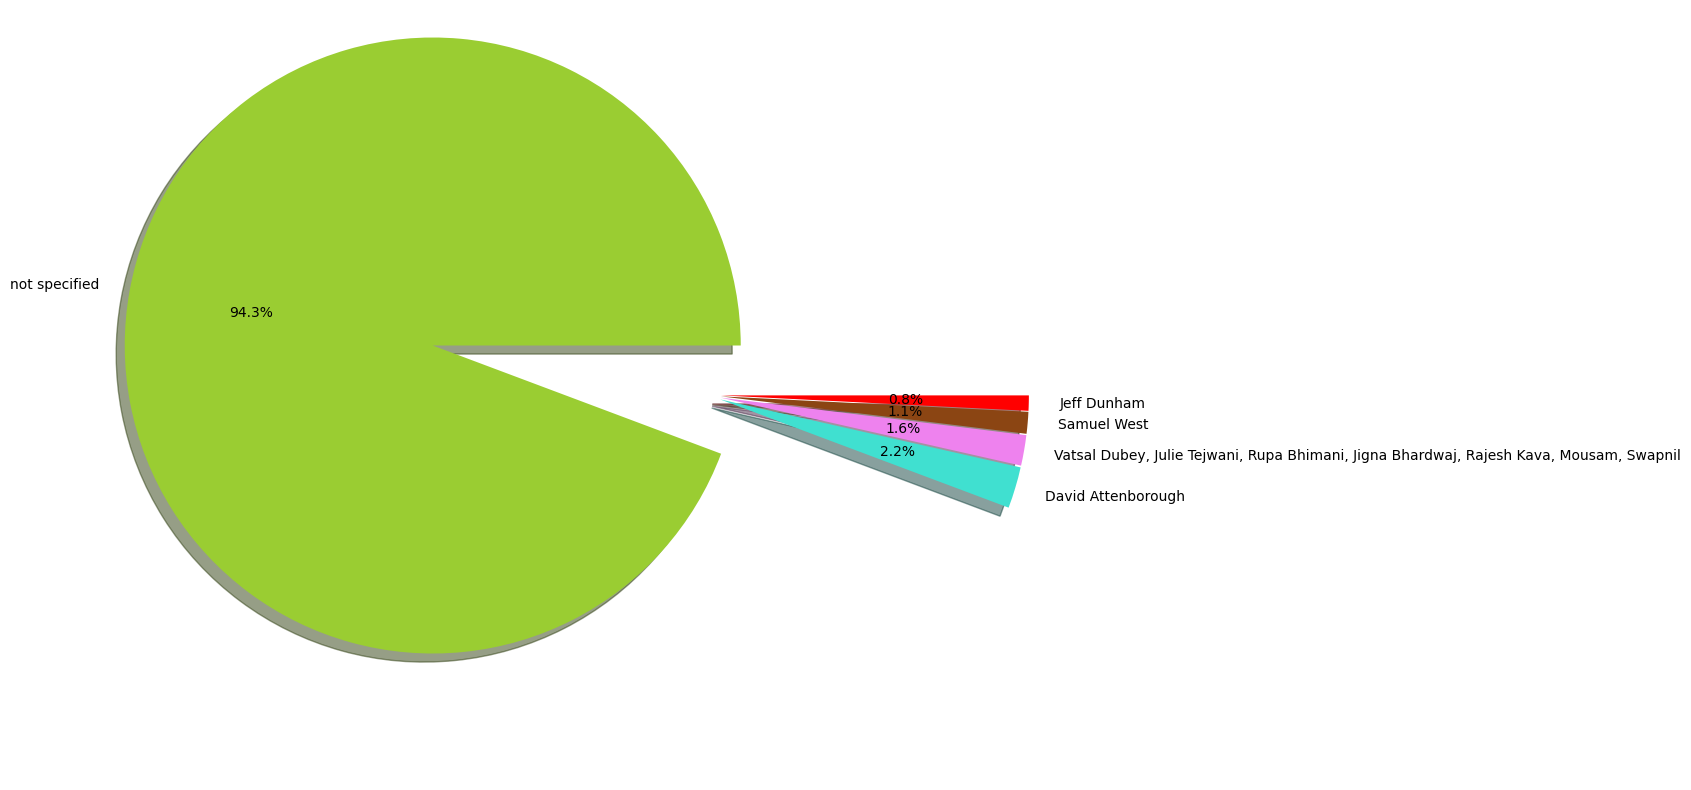

In [121]:
plt.figure(figsize=(10, 10))
plt.pie(df.cast.value_counts().head(5), labels=list(df.cast.value_counts().head(5).keys()), autopct="%0.1f%%"
        ,explode=[0.9, 0.05, 0.05, 0.05,0.05], colors=["#9ACD32", "#40E0D0", "#EE82EE", "#8B4513",'#FF0000'], shadow=True)
plt.show()
# plt.title("Cast")  #idk why i cant show the title

<h2>What is the duration of most content on Netflix?</h2>

In [122]:
df.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [123]:
x = list(df.country.value_counts().head(10).keys())
x

['United States',
 'India',
 'not specified',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Canada',
 'Spain',
 'France',
 'Mexico']

In [124]:
y = list(df.country.value_counts().head(10))
y

[2818, 972, 831, 419, 245, 199, 181, 145, 124, 110]

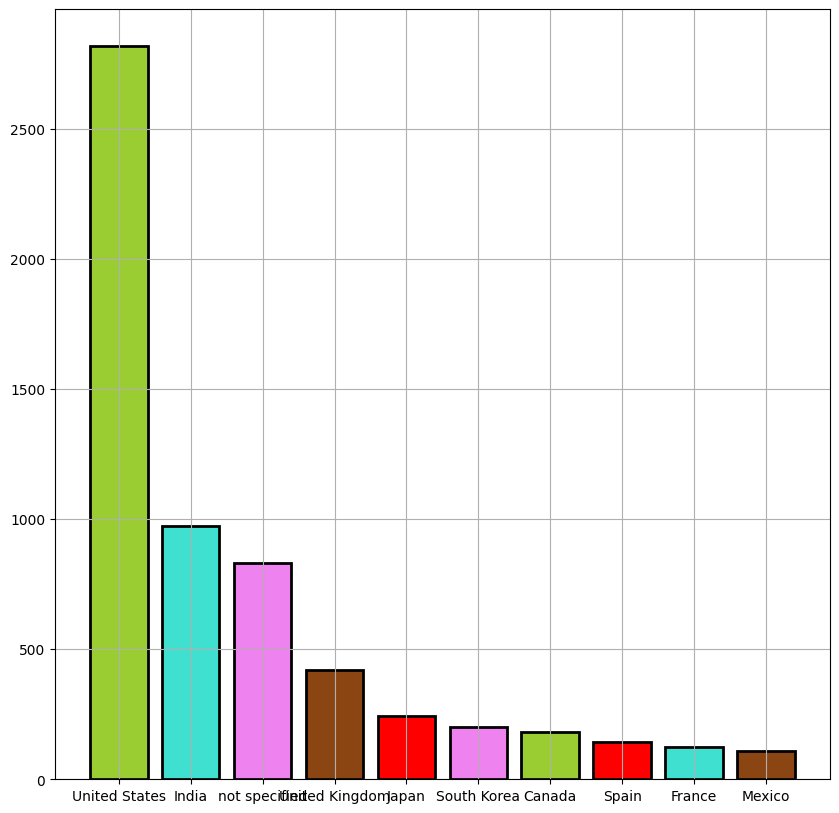

In [125]:
plt.figure(figsize=(10, 10))
bar_colors = ["#9ACD32", "#40E0D0", "#EE82EE", "#8B4513",'#FF0000', "#EE82EE", "#9ACD32", '#FF0000', "#40E0D0", "#8B4513"]
plt.bar(x, y, color=bar_colors, ec='black', lw=2)
plt.grid(True)
plt.show()

In [130]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,not specified,not specified,not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h2>Growth of content production on continious year?<h2>

In [191]:
data_set = (df.groupby(['type', 'release_year'])['title'].size()).reset_index() # To know how many titles produced one gropued type and year
data_set

,type,release_year,title
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


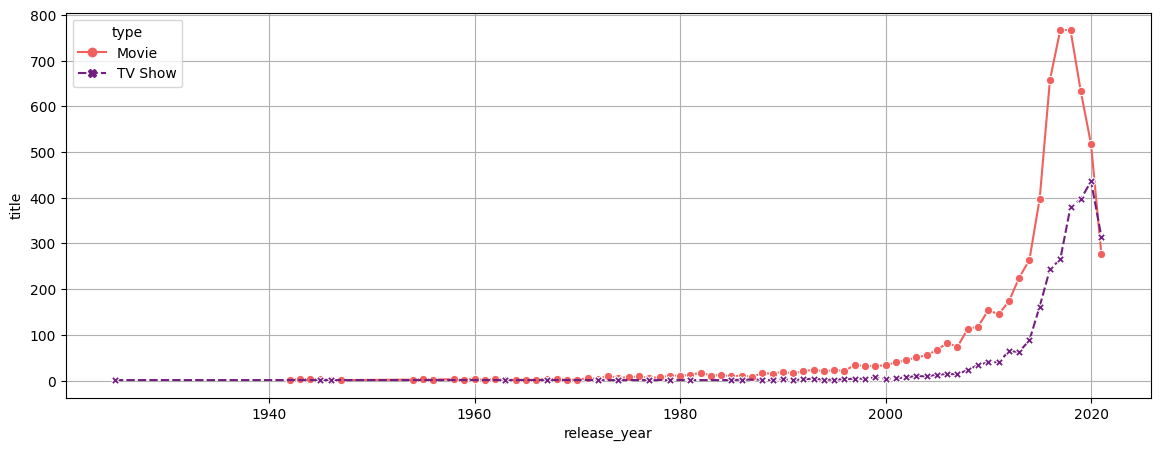

In [205]:
plt.figure(figsize=(14,5))
sns.lineplot(data=data_set, x = 'release_year', y ='title', hue='type', palette='magma_r', markers=True, style='type')
plt.grid(True)

<h2>Which country produce most movie compared to Tv Show on Netflix?<h2>

In [209]:
# Top 10 countries with most content production
type_count = df.country.value_counts().index[0:10]  
type_count

Index(['United States', 'India', 'not specified', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain', 'France', 'Mexico'],
      dtype='object', name='country')

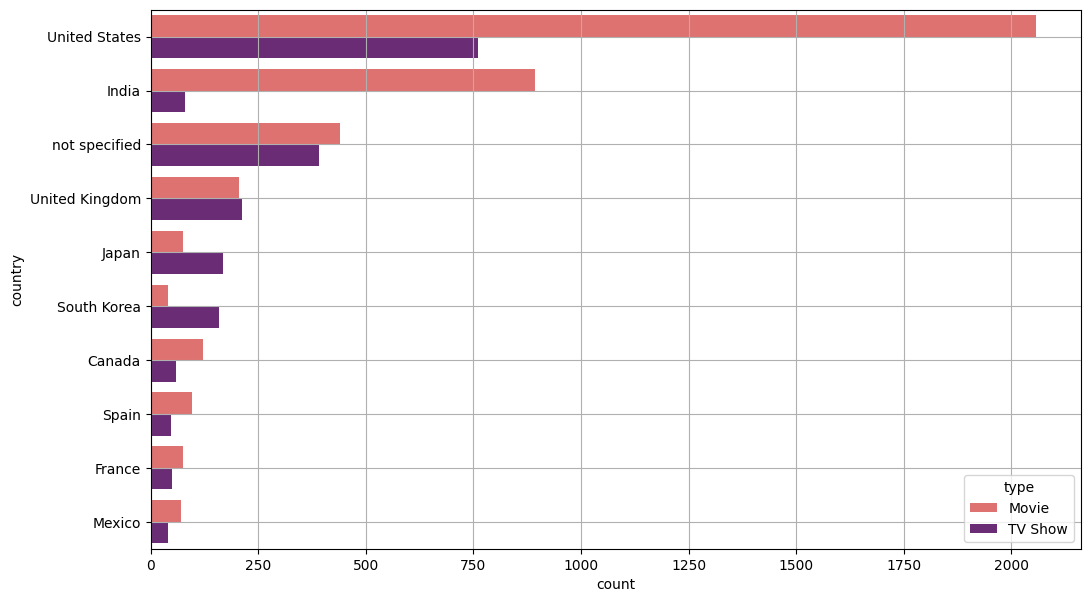

In [221]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, y = 'country', order=type_count, palette='magma_r', hue='type')
plt.grid(True)
plt.show()

<h2>What is the duration of most of the shows on Netflix?<h2
>

In [228]:
#most of the contents duration in top 10 fashion
df.duration.value_counts().head(10)

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64

In [227]:
y = list(df.duration.value_counts().head(10))
x = list(df.duration.value_counts().head(10).keys())
x

['1 Season',
 '2 Seasons',
 '3 Seasons',
 '90 min',
 '94 min',
 '97 min',
 '93 min',
 '91 min',
 '95 min',
 '96 min']

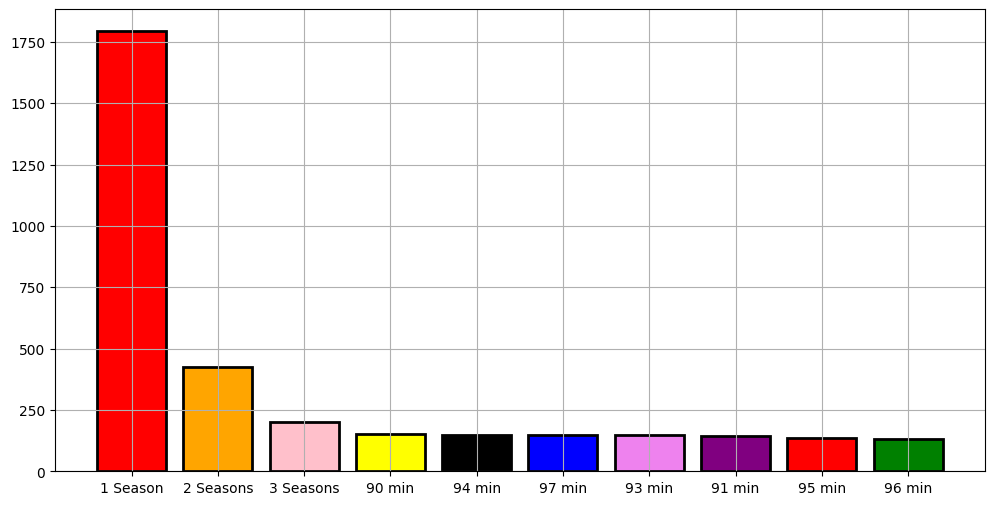

In [233]:
plt.figure(figsize=(12,6))
plt.bar(x, y, ec='black', lw=2, color=['red', 'orange', 'pink', 'yellow', 'black', 'blue', 'violet', 'purple', 'red', 'green'])
plt.grid(True)